# Lab | matplotlib-seaborn

#### Import all the libraries that are necessary

In [152]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

# Challenge 1

#### Data

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [4]:
df = pd.DataFrame(x)
df['y'] = y
df.rename(columns={0:'x'},inplace=True)
df['z'] = z
df.head()

,x,y,z
0,0,0,0
1,1,2,1
2,2,4,4
3,3,6,9
4,4,8,16


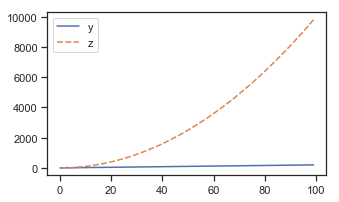

In [78]:
# your code here-2st way
plt.subplots(1,1,figsize=(5, 3))
sns.lineplot(data=df)

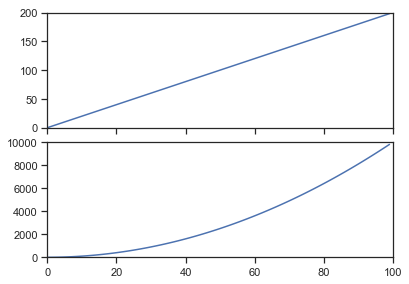

In [103]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.55, 0.8, 0.4],xticklabels=[], xlim=(0,100),ylim=(0, 200))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],xlim=(0,100), ylim=(0, 10000))
ax1.plot(df['y'])
ax2.plot(df['z'])

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

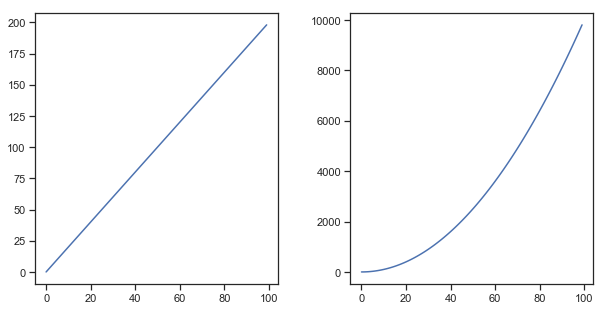

In [140]:
fig, ax = plt.subplots(1, 2, sharex='col',figsize=(10,5))
fig.subplots_adjust(wspace=0.3)
ax[0].plot(df['y'])
ax[1].plot(df['z'])

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

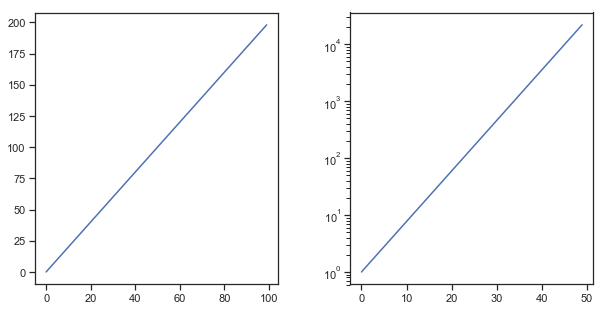

In [175]:
#your code here
y_exp = np.exp(x)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.subplots_adjust(wspace=0.3)
ax[0].plot(y)
ax[1].plot(y_exp)
ax[1].set_yscale('log')

# Challenge 2

#### Import the Fitbit2.csv file and name your dataset fitbit. You can also connect to the Ironhack database to retrieve the data (db: fitbit, table: fitbit2).

In [203]:
# your code here
fitbit_df = pd.read_csv("../data/Fitbit2.csv")
fitbit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
Date                          367 non-null object
Calorie burned                367 non-null int64
Steps                         367 non-null int64
Distance                      367 non-null float64
Floors                        367 non-null int64
Minutes Sedentary             367 non-null float64
Minutes Lightly Active        367 non-null int64
Minutes Fairly Active         367 non-null int64
Minutes Very Active           367 non-null int64
Activity Calories             367 non-null int64
MinutesOfSleep                367 non-null int64
MinutesOfBeingAwake           367 non-null int64
NumberOfAwakings              367 non-null int64
LengthOfRestInMinutes         367 non-null int64
Distance_miles                367 non-null float64
Days                          367 non-null object
Days_encoded                  367 non-null float64
Work_or_Weekend               367 non-null int64
Hou

#### From the Fitbit data, we want to visually understand:

How the median number of steps change by month. Use the appropriate visualization to show the median steps by month?
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.
Hints:

Use Months_encoded and Week_or Weekend columns
Use matplolib.pyplot object oriented API
Set your size figure to 12,4
Explore plt.sca
Explore plt.xticks
Save your figures

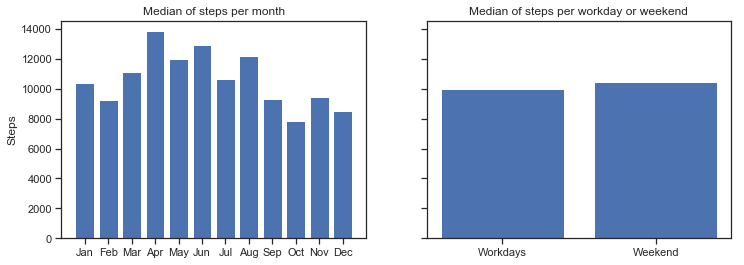

In [259]:
fig, ax = plt.subplots(1,2, sharey=True,squeeze=True, figsize=(12,4))
ind_0 = np.arange(len(fitbit_df.groupby('Months_encoded').median()['Steps']))
ind_1 = np.arange(len(fitbit_df.groupby('Work_or_Weekend').median()['Steps']))
# Median Steps by Month_encoded
ax[0].bar(ind_0, fitbit_df.groupby('Months_encoded').median()['Steps'])
# Median Steps by Work_or_Weekend
ax[1].bar(ind_1,fitbit_df.groupby('Work_or_Weekend').median()['Steps'])

ax[0].set_xticks(ind_0)
ax[1].set_xticks(ind_1)

ax[0].set_ylabel('Steps')
ax[0].set_title('Median of steps per month')
ax[1].set_title('Median of steps per workday or weekend')
ax[0].set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
ax[1].set_xticklabels(('Workdays', 'Weekend'))

plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps
* Minutes Very Active vs Steps
* Minutes Sedentary vs Steps

In [251]:
fitbit_df.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

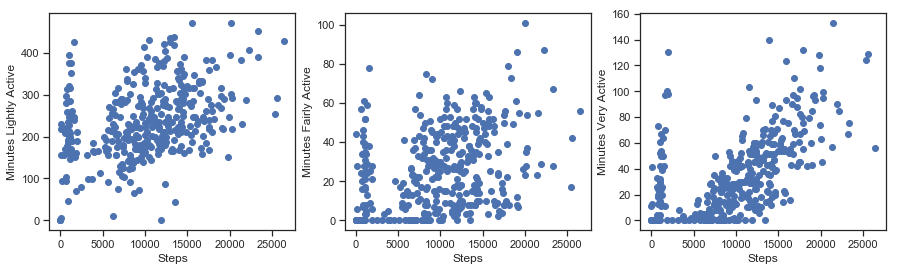

In [282]:
f, ax = plt.subplots(1,3,figsize=(15,4))
cols = ['Minutes Lightly Active', 'Minutes Fairly Active','Minutes Very Active']
for i in range(3):
    ax[i].scatter(fitbit_df['Steps'],fitbit_df[cols[i]])
    ax[i].set_ylabel(cols[i])
    ax[i].set_xlabel('Steps')

# Challenge 3

#### Open the titanic file. Name your dataset titanic. You can also connect to the Ironhack database to retrieve the data (db: titanic, table: titanic).

In [284]:
# your code here
from sqlalchemy import create_engine
driver = 'mysql+pymysql:'
user = 'ironhacker_read'
password = 'ir0nhack3r'
ip = '35.239.232.23'
database = 'titanic'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [287]:
titanic_df = pd.read_sql('titanic',con=engine)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [289]:
#your code here
titanic_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [291]:
# your code here- numerical variable
titanic_df.select_dtypes(include=['int64','float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [292]:
#your code here- categorical variable
titanic_df.select_dtypes(include='object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6)
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [302]:
# your code here
sns.set_style("whitegrid")
#There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks

#### Use the right visulalization to show the distribution of the column Age

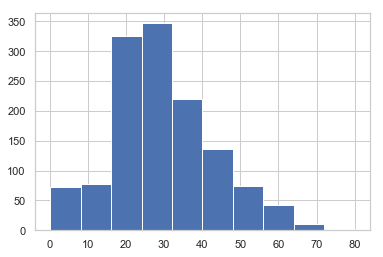

In [328]:
# your code here
plt.hist(titanic_df['Age'])
plt.show()

#### Use subplots and plot the distribution of the Age variable with bins equal to 10,20 and 50.

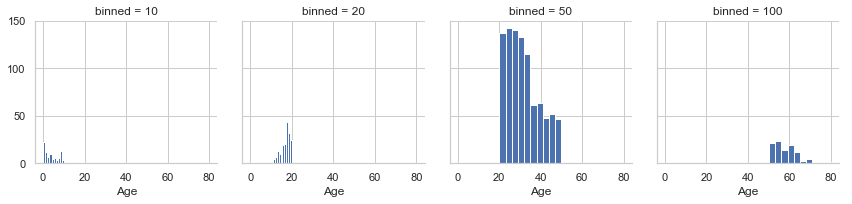

In [326]:
# your code here
bins = [0, 10, 20, 50, 100]
labels = [10,20,50,100]
titanic_df['binned'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)

g = sns.FacetGrid(titanic_df, col="binned")
g.map(plt.hist, "Age")
plt.show()

#### How does the bin size affect your plot? Comment.

In [ ]:
#your comment here

#### Use seaborn to show the distribution of the column Age

In [ ]:
# your code here

#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

In [ ]:
# your code here- 1st way

In [ ]:
# your code here- 2nd way

#### Use the right plot to visualize the column Pclass

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

In [ ]:
#your comment here

#### What does the last plot tells you about the feature Age? Comment.

In [ ]:
# your comment here

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

In [ ]:
#your code here

#### What additional information the last plot provides you about the feature Age? Comment.

In [ ]:
#your comment here

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn

In [ ]:
#your code- 1st way

In [ ]:
# your code-2nd way

#### Using Seaborn plot the correlation matrix 

In [ ]:
#your code here

#### What are the most correlated feature? Comment

In [ ]:
#your comment here

#### Use the right plot to display the summary statistics of the Age in function of the Pclass

In [ ]:
#your code here

#### Use the seaborn to plot the distribution of the Age based on the Gender
Hint: Use Facetgrid

In [ ]:
#your code here